In [1]:
#import dependencies 
import random
import copy
from timeit import default_timer as timer
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [39]:
lst = [1,2,3,7]
lst2 = [1,2,3,4,5,6,7,8]

In [43]:
[i for i in lst2 if i not in lst]

[4, 5, 6, 8]

## Creating a Texas Holdem Class
- Below a class is made that does several things
1. Hand- creates a hand of two cards and seperates them from the deck so that the simulation can shuffle the remaining 50 cards and create thousands of randoms hands
2. Table- deals the cards out to the correct number of players (for the Winning hand determination) and fills the table with cards (5 2 or 1 card can be swapped out for the simulation)
     - The number of simulated hands should still be relatively high for one card swaps because the number the winning hand class
3. Prob- Identifies if a hand hit any of the possibe draws 
    - Note: I decided that if something is hit and a better hand is hit simultaniously or later the worse hand is still counted as being hit
    - IE: if you have pocket aces you will hit a pair 100% of the time even if some of the time you end up with three of a kind, two pair, or full house. 

In [44]:
class TH:
    '''
    Texas Holdem Class
    '''
    class Hand:
        '''
        
        '''
        def __init__(self):
            cards = [2,3,4,5,6,7,8,9,10,11,12,13,14]
            suits = ['H','D','S','C']
            self.deck = [(card,suit) for card in cards for suit in suits]
            random.shuffle(self.deck)
            self.selected_hand = []
        def player_1(self):
            '''
            selects two random cards for the player
            '''
            return self.deck[:2]
        def table(self,cards_on_table = 3):
            '''
            places cards_on_table number of random cards on the table
            '''
            return self.deck[2:2+cards_on_table], self.deck[2+cards_on_table:]
        def hand_selection(self):
            '''
            Select your desired hand
            '''
            card_1_value = input('Card 1 value:')
            card_1_suit = input('Card 1 suit:')
            card1 = (int(card_1_value), card_1_suit)
            card_2_value = input('Card 2 value:')
            card_2_suit = input('Card 2 suit:')
            card2 = (int(card_2_value), card_2_suit) 
            self.selected_hand.append(card1)
            self.selected_hand.append(card2)
            return self.selected_hand
            

        def table_selection(self, cards_on_table):
            '''
            select_cards on table
            '''
            on_table = []
            if cards_on_table >= 3:
                table1_value = input('table 1 value:')
                table1_suit = input('table 1 suit:')
                on_table.append((int(table1_value),table1_suit))

                table2_value = input('table 2 value:')
                table2_suit = input('table 2 suit:')
                on_table.append((int(table2_value),table2_suit))
                
                table3_value = input('table 3 value:')
                table3_suit = input('table 3 suit:')
                on_table.append((int(table3_value),table3_suit))
                
            if cards_on_table == 4:
                table1_value = input('table 4 value:')
                table1_suit = input('table 4 suit:')
                on_table.append((int(table4_value),table4_suit))
                
            deck_return = [i for i in self.deck if i != self.selected_hand[0] and i != self.selected_hand[1]]
            deck_return_minus_table = [i for i in deck_return if i not in on_table]
            return on_table, deck_return_minus_table
            

    class Table:
        '''
        '''
        def __init__(self, player_1, table, player_count = 5):
            self.player_1 = player_1
            self.table = table[0]
            self.player_count = player_count
            self.hands = player_1[0]
            self.remaining_deck = table[1]
            random.shuffle(self.remaining_deck)

        def deal(self):
            '''
            '''
            remaining_deck_copy = copy.copy(self.remaining_deck)
            hands = [[] for _ in range(self.player_count-1)]
            for _ in range(2): #hands everyone one card and then a second
                for i in range(self.player_count-1):
                    hands[i].append(remaining_deck_copy.pop())
            table_dealt = [*self.table, *remaining_deck_copy[-(5-len(self.table)):]]
            return hands, table_dealt

    class Hit_Hand:
        '''
        '''
        def __init__(self, player_1, deal, print_hand = False):
            self.player_1 = player_1
            self.other_players = deal[0]
            self.table = deal[1]
            self.total_hand = [*player_1,*self.table]
            self.suits = [x[1] for x in self.total_hand]
            self.value = [x[0] for x in self.total_hand] #list of cards
            if print_hand == True:
                print('Your Cards:')
                print(self.player_1)
                print('Table:')
                print(self.table)
                
        #this needs to be tested
        def straight_flush(self):
            hand = []
            if (self.suits.count('H') >= 5):
                for card in self.total_hand:
                    if card[1] == 'H':
                        hand.append(card)
                            
            elif (self.suits.count('S') >= 5):
                for card in self.total_hand:
                    if card[1] == 'S':
                        hand.append(card)
                        
            elif (self.suits.count('D') >= 5):
                for card in self.total_hand:
                    if card[1] == 'D':
                        hand.append(card)
                        
            elif (self.suits.count('C') >= 5):
                for card in self.total_hand:
                    if card[1] == 'C':
                        hand.append(card)
            if len(hand) >= 5:
                #if their is a 14 add a 1 to the begining because Ace is high or low for straight
                hand_values = [x[0] for x in hand]
                cards = list(set(hand_values))
                if cards.count(14) == 1:
                    cards.append(1)
                cards.sort()
                c = 1
                for i in range(len(cards)-1):
                    if cards[i] + 1 == cards[i + 1]:
                        c += 1
                    elif c == 5:
                        return True
                    else:
                        c = 1
                return (c == 5)
            return False
        
        def four_of_kind(self):
            c = 0
            for i in set(self.value):
                if self.value.count(i) == 4:
                    c += 1
            return (c == 1)
        
        def full_house(self):
            pair = 0
            three = 0
            for i in set(self.value):
                if self.value.count(i) == 2:
                    pair += 1
                elif self.value.count(i) >= 3:
                    three += 1
            return ((pair >= 1) and (three == 1)) or (three >= 2)
        
        def flush(self):
            return (self.suits.count('H') >= 5) or (self.suits.count('D') >= 5) or \
        (self.suits.count('S') >= 5) or (self.suits.count('C') >= 5)

        def straight(self):
            #if their is a 14 add a 1 to the begining because Ace is high or low for straight
            cards = list(set(self.value))
            if cards.count(14) == 1:
                cards.append(1)
            cards.sort()
            c = 1
            for i in range(len(cards)-1):
                if cards[i] + 1 == cards[i + 1]:
                    c += 1
                elif c >= 5:
                    return True
                else:
                    c = 1
            return (c >= 5)

        def three_of_kind(self):
            c = 0
            for i in set(self.value):
                if self.value.count(i) >= 3:
                    c += 1
            return (c == 1)

        def two_pair(self):
            c = 0
            for i in set(self.value):
                if self.value.count(i) >= 2:
                    c += 1
            return (c >= 2)
        
        def pair(self):
            for i in set(self.value):
                if self.value.count(i) >= 2:
                    return True
            return False      

        
    #identifying the best hand
    class Best_Hand:
        '''
        '''
        def __init__(self, player_1, deal, print_hand = False):
            self.player_1 = player_1
            self.other_players = deal[0]
            self.table = deal[1]
            self.total_hand = [*player_1,*self.table]
            self.suits = [x[1] for x in self.total_hand]
            self.value = [x[0] for x in self.total_hand] #list of cards
            if print_hand == True:
                print('Your Cards:')
                print(self.player_1)
                print('Table:')
                print(self.table)                
                
        #done
        def straight_flush(self):
            hand = []
            if (self.suits.count('H') >= 5):
                for card in self.total_hand:
                    if card[1] == 'H':
                        hand.append(card)
                            
            elif (self.suits.count('S') >= 5):
                for card in self.total_hand:
                    if card[1] == 'S':
                        hand.append(card)
                        
            elif (self.suits.count('D') >= 5):
                for card in self.total_hand:
                    if card[1] == 'D':
                        hand.append(card)
                        
            elif (self.suits.count('C') >= 5):
                for card in self.total_hand:
                    if card[1] == 'C':
                        hand.append(card)
            if len(hand) >= 5:
                #if their is a 14 add a 1 to the begining because Ace is high or low for straight
                cards = list(set(self.value))
                if cards.count(14) == 1:
                    cards.append(1)
                cards.sort()
                c = 1
                hand = []
                for i in range(len(cards)-1):
                    if (cards[i] + 1) == cards[i + 1]:
                        c += 1
                        if len(hand) == 0:
                            hand.append(cards[i])
                            hand.append(cards[i+1])
                        else:
                            hand.append(cards[i+1])
                    elif c >= 5:
                        return hand[-5:]
                    else:
                        c = 1
                        hand = []
                        
        def four_of_kind(self):
            hand = []
            for card in self.value:
                if self.value.count(card) == 4:
                    hand.append(card)
            if len(hand) == 4:
                high_cards = sorted(self.value)
                if high_cards[-1] != hand[0]:
                    hand.append(high_cards[-1])
                else:
                    hand.append(high_cards[-5])
                return hand[::-1]
        
        def full_house(self):
            pair_hand = list()
            three_hand = list()
            for card in set(self.value):
                if self.value.count(card) == 2:
                    pair_hand.append(card)
                elif self.value.count(card) == 3:
                    three_hand.append(card)
            if len(three_hand) == 2:
                return [min(three_hand), min(three_hand), max(three_hand), max(three_hand), max(three_hand)]
            elif len(three_hand) == 1 and len(pair_hand) >= 1:
                return [max(pair_hand),max(pair_hand),max(three_hand),max(three_hand), max(three_hand)]
                 
        def flush(self):
            hand = []
            if (self.suits.count('H') >= 5):
                for card in self.total_hand:
                    if card[1] == 'H':
                        hand.append(card)
                            
            elif (self.suits.count('S') >= 5):
                for card in self.total_hand:
                    if card[1] == 'S':
                        hand.append(card)
                        
            elif (self.suits.count('D') >= 5):
                for card in self.total_hand:
                    if card[1] == 'D':
                        hand.append(card)
                        
            elif (self.suits.count('C') >= 5):
                for card in self.total_hand:
                    if card[1] == 'C':
                        hand.append(card)
            if len(hand) > 1:
                hand_value = [x[0] for x in hand]
                return sorted(hand_value)[-5:]

        def straight(self):
            #if their is a 14 add a 1 to the begining because Ace is high or low for straight
            cards = list(set(self.value))
            if cards.count(14) == 1:
                cards.append(1)
            cards.sort()
            hand = []
            for i in range(len(cards)-1):
                if (cards[i] + 1) == cards[i + 1]:
                    if len(hand) == 0:
                        hand.append(cards[i])
                        hand.append(cards[i+1])
                    else:
                        hand.append(cards[i+1])
                if len(hand) >= 5:
                    return hand[-5:]
                elif (cards[i] + 1) != cards[i + 1]:
                    hand = []
        
        def three_of_kind(self):
            hand = []
            for card in self.value:
                if self.value.count(card) == 3:
                    hand.append(card)
            if len(hand) == 3:
                high_cards = []
                for num in sorted(self.value):
                    if num != hand[0]:
                        high_cards.append(num)
                hand.append(high_cards[-1])
                hand.append(high_cards[-2])
                return hand[::-1]

        def two_pair(self):
            c = 0
            hand = []
            for card in self.value:
                if self.value.count(card) == 2:
                    c += 1
                    hand.append(card)
            if (c >= 4):
                top_pairs = sorted(hand)[-4:][::-1]
                high_card = []
                for num in sorted(self.value):
                    if num != top_pairs[-3] and num != top_pairs[-1]:
                        high_card.append(num)
                top_pairs.append(high_card[-1])
                return top_pairs[::-1]
            
        def pair(self):
            hand = []
            for card in self.value:
                if self.value.count(card) == 2:
                    hand.append(card)
            if len(hand) == 2:
                high_cards = []
                for num in sorted(self.value):
                    if num != hand[0]:
                        high_cards.append(num)
                hand.append(high_cards[-1])
                hand.append(high_cards[-2])
                hand.append(high_cards[-3])
                return hand[::-1]
            
        def high_card(self):
            return sorted(self.value)[-5:]

In [45]:
def display_cards():
    player_card1 = mpimg.imread(f'cards/{str(p1[0][0]) + p1[0][1]}.PNG')
    player_card2 = mpimg.imread(f'cards/{str(p1[1][0]) + p1[1][1]}.PNG')
    #### HAND #####
    #card1
    plt.subplot2grid(shape = (6,15),loc = (0,0),rowspan =2,colspan = 3)
    plt.imshow(player_card1)
    plt.xticks([])
    plt.yticks([])
    plt.box(False)

    #card2
    plt.subplot2grid(shape = (6,15),loc = (0,3),rowspan =2,colspan = 3)
    plt.imshow(player_card2)
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    if len(table[0]) >= 3:
        table1 = mpimg.imread(f'cards/{str(table[0][0][0]) + table[0][0][1]}.PNG')
        table2 = mpimg.imread(f'cards/{str(table[0][1][0]) + table[0][1][1]}.PNG')
        table3 = mpimg.imread(f'cards/{str(table[0][2][0]) + table[0][2][1]}.PNG')
        
        ##### TABLE #####
        #table1
        plt.subplot2grid(shape = (6,15),loc = (2,0),rowspan =2,colspan = 3)
        plt.imshow(table1)
        plt.xticks([])
        plt.yticks([])
        plt.box(False)

        # #table2
        plt.subplot2grid(shape = (6,15),loc = (2,3),rowspan =2,colspan = 3)
        plt.imshow(table2)
        plt.xticks([])
        plt.yticks([])
        plt.box(False)

        # #table3
        plt.subplot2grid(shape = (6,15),loc = (2,6),rowspan =2,colspan = 3)
        plt.imshow(table3)
        plt.xticks([])
        plt.yticks([])
        plt.box(False)
    if len(table[0]) >= 4:
        table4 = mpimg.imread(f'cards/{str(table[0][3][0]) + table[0][3][1]}.PNG')
        ##### TABLE #####
        #table4
        plt.subplot2grid(shape = (6,15),loc = (2,9),rowspan =2,colspan = 3)
        plt.imshow(table4)
        plt.xticks([])
        plt.yticks([])
        plt.box(False)

Card 1 value:10
Card 1 suit:H
Card 2 value:10
Card 2 suit:C
table 1 value:10
table 1 suit:D
table 2 value:10
table 2 suit:S
table 3 value:14
table 3 suit:D
Your Cards:
 [(10, 'H'), (10, 'C')] 
Table:
 [(10, 'D'), (10, 'S'), (14, 'D')]


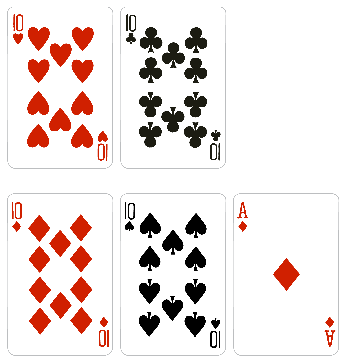

In [49]:
#creating a single hand to itterate over
#this one you chose yourself
Game = TH.Hand()
Cards = Game.hand_selection()
table = Game.table_selection(cards_on_table = 3) # 0 3 or 4
p1 = Cards
print(
    f'Your Cards:\n {p1}',
    f'\nTable:\n {table[0]}'
)
plt.figure(figsize = (10,10))
display_cards()

Your Cards:
 [(7, 'H'), (4, 'S')] 
Table:
 [(5, 'S'), (2, 'S'), (14, 'C')]


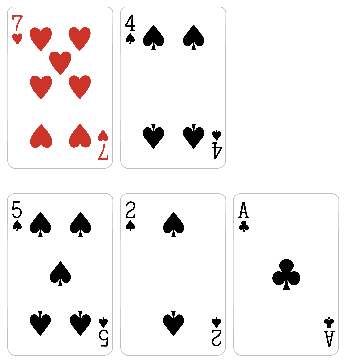

In [48]:
#creating a single hand to itterate over
Game = TH.Hand()
Cards = Game.player_1()
table = Game.table(cards_on_table = 3) # 0 3 or 4
p1 = Cards
print(
    f'Your Cards:\n {p1}',
    f'\nTable:\n {table[0]}'
)
plt.figure(figsize = (10,10))
display_cards()

In [50]:
#Example 
#dependent on what you set the above numbers to you will see a different number of new cards
n_players = 2
Texas_Holdem = TH.Table(Cards,table,n_players)
dealt = Texas_Holdem.deal()
print('Others Hands: \n',dealt[0])
Holdem = TH.Hit_Hand(p1,dealt,print_hand = True)

Others Hands: 
 [[(12, 'H'), (4, 'C')]]
Your Cards:
[(10, 'H'), (10, 'C')]
Table:
[(10, 'D'), (10, 'S'), (14, 'D'), (7, 'S'), (13, 'H')]


In [51]:
len(dealt[0])

1

In [52]:
def top_hand(hand):
    Texas_Holdem = TH.Table(hand,table,n_players)
    dealt = Texas_Holdem.deal()
    Holdem_hand = TH.Best_Hand(hand,dealt,print_hand = False)
    hands_form =  {
        'straight_flush' : Holdem_hand.straight_flush(), #straight flush
        'four_of_kind' : Holdem_hand.four_of_kind(),     #four of a kind
        'full_house' : Holdem_hand.full_house(),         #full house
        'flush' : Holdem_hand.flush(),                   #flush
        'straight' : Holdem_hand.straight(),             #straight
        'three_of_kind' : Holdem_hand.three_of_kind(),   #three of a kind
        'two_pair' : Holdem_hand.two_pair(),             #two pair
        'pair' : Holdem_hand.pair(),                     #pair
        'high_card': Holdem_hand.high_card()             #high card
    }
    i = 10
    for key, value in hands_form.items():
        i -= 1
        if value != None:
            return [(i,key), value]

top_hand(Cards)

[(8, 'four_of_kind'), [14, 10, 10, 10, 10]]

In [53]:
def winner(hand,comparison_hand,print_details = False):
    p1 = top_hand(hand)
    p2 = top_hand(comparison_hand)
    if print_details == True:
        print('Cards on Table:\n', dealt[1], '\n\n')
        print('player 1 hand:', hand)
        print('Player 1:',p1)
        print('player 2 hand:', comparison_hand)
        print('Player 2:',p2)
        print('\n')

    if p1[0][0] > p2[0][0]:
        return True
    elif p1[0][0] == p2[0][0]:
        #compare each card starting at the most important
        for i in range(1,5):
            if p1[1][-i] > p2[1][-i]:
                return True
            elif p1[1][-i] < p2[1][-i]:
                return False   
        #if all cards are equal its a tie and we are calling ties wins because no money is lost in a tie
        return True 
    elif p1[0][0] < p2[0][0]:
        return False

In [54]:
winner(Cards, dealt[0][0], print_details = True)
#when pinning these two players against eachother they may have access to eachothers cards?  player 2 should not have
# a full house

Cards on Table:
 [(10, 'D'), (10, 'S'), (14, 'D'), (7, 'S'), (13, 'H')] 


player 1 hand: [(10, 'H'), (10, 'C')]
Player 1: [(8, 'four_of_kind'), [14, 10, 10, 10, 10]]
player 2 hand: [(12, 'H'), (4, 'C')]
Player 2: [(2, 'pair'), [7, 12, 14, 10, 10]]




True

In [55]:
def all_players(hand,other_players_hands):
    beat = []
    for player_hand in other_players_hands:
        beat.append(winner(hand,player_hand))
    return all(beat)

In [56]:
all_players(Cards,dealt[0])

True

In [57]:
#create a simulator that deals the cards and switches the "dealt[0]" every time
def winner_probabilty(hand, n = 1000):
    wins = 0
    for i in range(n):
        wins += all_players(hand,dealt[0])
    return (wins/n)*100

In [58]:
# 10 player texas holdem pocket aces have a 31% chance of winning if everyone stays in
start = timer()

probability_of_winning = winner_probabilty(Cards, n = 100000)

end = timer()
print(f'Execution time: {round(end - start,2)}s')
print(probability_of_winning)

Execution time: 11.4s
100.0


---

In [59]:
def hand_ranked(hand):
    Texas_Holdem = TH.Table(hand,table,n_players)
    dealt = Texas_Holdem.deal()
    Holdem = TH.Hit_Hand(p1,dealt)
    return {
        'straight_flush' : Holdem.straight_flush(), #straight flush
        'four_of_kind' : Holdem.four_of_kind(),     #four of a kind
        'full_house' : Holdem.full_house(),         #full house
        'flush' : Holdem.flush(),                   #flush
        'straight' : Holdem.straight(),             #straight
        'three_of_kind' : Holdem.three_of_kind(),   #three of a kind
        'two_pair' : Holdem.two_pair(),             #two pair
        'pair' : Holdem.pair()                      #pair
        }

hand_ranked(Cards)

{'straight_flush': False,
 'four_of_kind': True,
 'full_house': False,
 'flush': False,
 'straight': False,
 'three_of_kind': True,
 'two_pair': False,
 'pair': True}

In [60]:
#look into if you can do this faster by summing dictionary values or using a pandas dataframe? list?
def probabilities(hand, n = 1000):
    straight_flush = 0
    four_of_kind = 0
    full_house = 0
    flush = 0
    straight = 0
    three_of_kind = 0
    two_pair = 0
    pair = 0
    for i in range(n):
        sim_hand = hand_ranked(hand)
        straight_flush += sim_hand['straight_flush'] #straight flush
        four_of_kind += sim_hand['four_of_kind'] #four of a kind
        full_house += sim_hand['full_house'] #full house
        flush += sim_hand['flush'] #flush
        straight += sim_hand['straight'] #straight
        three_of_kind += sim_hand['three_of_kind'] #three of a kind
        two_pair += sim_hand['two_pair'] #two pair
        pair += sim_hand['pair'] #pair
    return {'Straight Flush': (straight_flush/n)*100,
            'Four of a Kind': (four_of_kind/n)*100,
            'Full House': (full_house/n)*100,
            'Flush': (flush/n)*100,
            'Straight': (straight/n)*100,
            'Three of a Kind': (three_of_kind/n)*100,
            'Two Pair': (two_pair/n)*100,
            'Pair': (pair/n)*100}

In [61]:
start = timer()

simulated_hands = 100000
prob_of_hitting = probabilities(Cards, n = simulated_hands)

print(f'Your Hand: {p1}\n',
    f'The Table: {table[0]}\n\n',
)

end = timer()
print(f'Execution time: {round(end - start,2)}s')
prob_of_hitting

Your Hand: [(10, 'H'), (10, 'C')]
 The Table: [(10, 'D'), (10, 'S'), (14, 'D')]


Execution time: 5.27s


{'Straight Flush': 0.0,
 'Four of a Kind': 100.0,
 'Full House': 18.541,
 'Flush': 0.0,
 'Straight': 0.0,
 'Three of a Kind': 99.746,
 'Two Pair': 18.541,
 'Pair': 100.0}

## Agenda

2. check if the cards from other players are accessing the correct deck and being compared with the same five hand
3. look into front end tablaeu public
4. start medium article
5. clean the code
6. try to put every function inside of a class and move the jupyter notebook into a txt file

## Graphing

In [62]:
prob_of_hitting
x, y = zip(*prob_of_hitting.items())

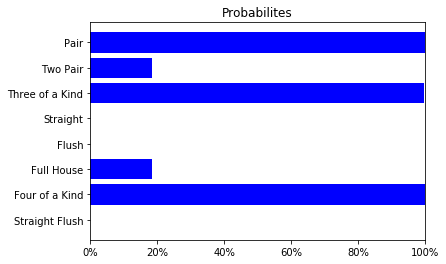

In [63]:
plt.barh(x, y, color = 'b')
plt.title('Probabilites')
plt.xlim(0,100)
plt.xticks(ticks = [0,20,40,60,80,100], labels = ['0%','20%','40%','60%','80%','100%'])
plt.show()

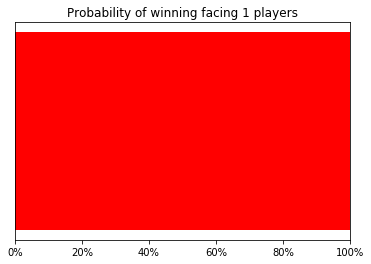

In [64]:
plt.barh(y = 'Winning Probability',width = probability_of_winning,color = 'r')
plt.yticks([])
plt.xticks(ticks = [0,20,40,60,80,100], labels = ['0%','20%','40%','60%','80%','100%'])
plt.xlim(0,100)
plt.title(f'Probability of winning facing {len(dealt[0])} players')
plt.show()

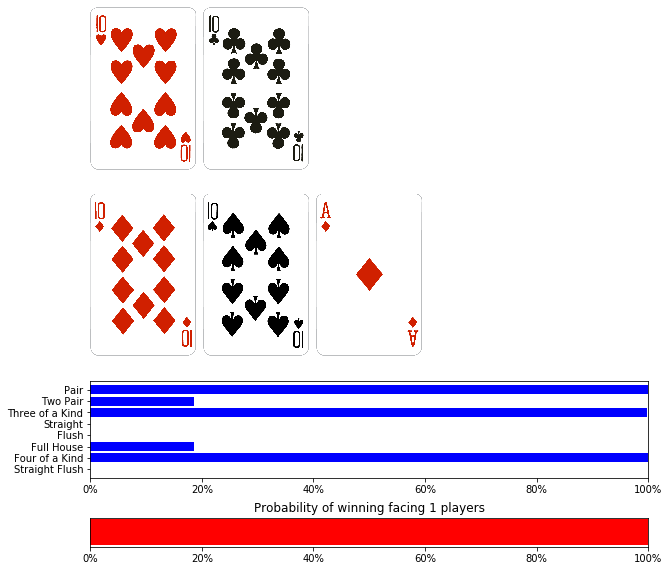

In [65]:
plt.figure(figsize = (10,10))

#cards
plt.subplot2grid(shape = (16,15),loc = (0,0),rowspan =1,colspan = 1)
display_cards()

#hands hit probability
plt.subplot2grid(shape = (16,15),loc = (11,0),rowspan =3,colspan = 15)
plt.barh(x, y, color = 'b')
plt.title('')
plt.xlim(0,100)
plt.xticks(ticks = [0,20,40,60,80,100], labels = ['0%','20%','40%','60%','80%','100%'])

#winning probability
plt.subplot2grid(shape = (16,15),loc = (15,0),rowspan =1,colspan = 15)
plt.barh(y = 'Winning Probability',width = probability_of_winning,color = 'r')
plt.yticks([])
plt.xticks(ticks = [0,20,40,60,80,100], labels = ['0%','20%','40%','60%','80%','100%'])
plt.xlim(0,100)
plt.title(f'Probability of winning facing {len(dealt[0])} players')

plt.show()